1. Gerekli kütüphaneler

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import joblib

2. Veriyi okuma

In [47]:
# 📥 Veriyi oku
train_df = pd.read_csv("normal/train_mental.csv")
test_df = pd.read_csv("normal/test_mental.csv")

X_test = test_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

# Eski 'treatment' sütununu da silelim
X_train = train_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

In [48]:
# 📊 Eğitim veri setini yazdırma
print("🔍 Eğitim Veri Seti (İlk 5 Satır):")
print(X_train.head())

print("\n📝 Eğitim Veri Seti Bilgisi:")
print(X_train.info())

print("\n📊 Eğitim Veri Seti İstatistikleri:")
print(X_train.describe(include='all'))

🔍 Eğitim Veri Seti (İlk 5 Satır):
   Age  Gender  Country  family_history  treatment  work_interfere  \
0   23       1       41               0          0               2   
1   19       1       44               0          0               3   
2   28       1       45               1          0               3   
3   41       1       45               1          1               1   
4   25       1       45               1          0               3   

   no_employees  remote_work  tech_company  benefits  ...  anonymity  leave  \
0             4            0             1         0  ...          0      3   
1             0            0             1         1  ...          1      0   
2             4            0             1         0  ...          0      1   
3             5            0             1         2  ...          0      1   
4             2            0             1         0  ...          0      3   

   mental_health_consequence  phys_health_consequence  coworkers  supe

3. PCA ile boyut indirgeme

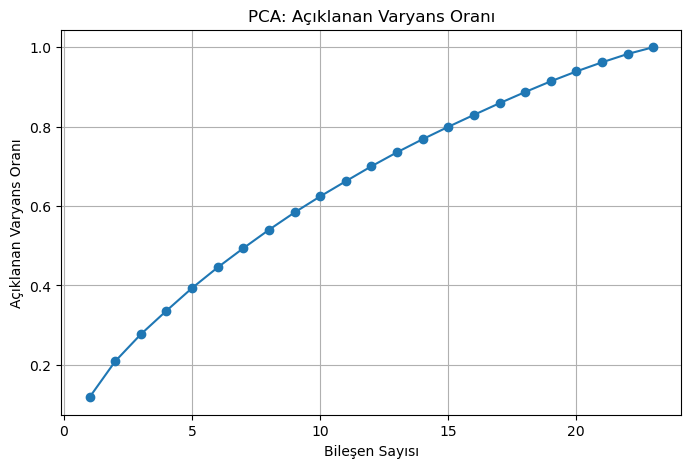

✅ %95 varyans oranı için bileşen sayısı: 20
🔢 Azaltılmış boyut: 20


In [49]:
# 🔄 Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌟 PCA Uygulama (Tüm bileşenler)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 📊 Varyans Oranı Grafiği
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Açıklanan Varyans Oranı')
plt.title('PCA: Açıklanan Varyans Oranı')
plt.grid(True)
plt.show()

# 🌟 Bileşen sayısı seçme (örn: %95 varyans oranı)
n_components = sum(pca.explained_variance_ratio_.cumsum() <= 0.95)
print(f"✅ %95 varyans oranı için bileşen sayısı: {n_components}")

# 🌟 Seçilen bileşen sayısı ile PCA uygulama
pca_opt = PCA(n_components=n_components)
X_train_pca_opt = pca_opt.fit_transform(X_train_scaled)
X_test_pca_opt = pca_opt.transform(X_test_scaled)

print(f"🔢 Azaltılmış boyut: {X_train_pca_opt.shape[1]}")

In [50]:
# 📊 PCA sonrası verileri DataFrame'e çevirme
pca_train_df = pd.DataFrame(X_train_pca, columns=X_train.columns)  # Orijinal sütun isimleri
pca_train_df["support_needed"] = y_train.values  # ✅ doğru etiket

pca_test_df = pd.DataFrame(X_test_pca, columns=X_test.columns)  # Orijinal sütun isimleri
pca_test_df["support_needed"] = y_test.values  # ✅ doğru etiket

# 💾 CSV olarak kaydetme
try:
    pca_train_df.to_csv("pca/train_mental_pca.csv", index=False)
    pca_test_df.to_csv("pca/test_mental_pca.csv", index=False)
    print("✅ PCA sonrası veriler başarıyla kaydedildi. (Orijinal sütun isimleri korundu)")
except Exception as e:
    print(f"❌ Verileri kaydederken hata oluştu: {str(e)}")

✅ PCA sonrası veriler başarıyla kaydedildi. (Orijinal sütun isimleri korundu)
